# Problem Statement:

-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

-The objective here is to create CNN model which will classify whether on the given rice leaf what kind of disease is present.

-The dataset contains images of rice leaf and there are 3 classes/diseases: Bacterial leaf blight, Brown spot, and Leaf smut, each having 40 images.


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
# Setup Environment
input_shape_2D = (224,224)
input_shape_3D = (224,224,3)
seed = 1
batch_size = 32
epochs = 30

In [5]:
# Load the image data
data = tf.keras.utils.image_dataset_from_directory(directory="Rice Leaf",
                                                  labels='inferred',
                                                  label_mode='int',
                                                  class_names=None ,
                                                  color_mode='rgb',
                                                  image_size=input_shape_2D,
                                                  seed=seed)

Found 119 files belonging to 3 classes.


In [6]:
# Print Class Names
class_names = data.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

# Visualise Images

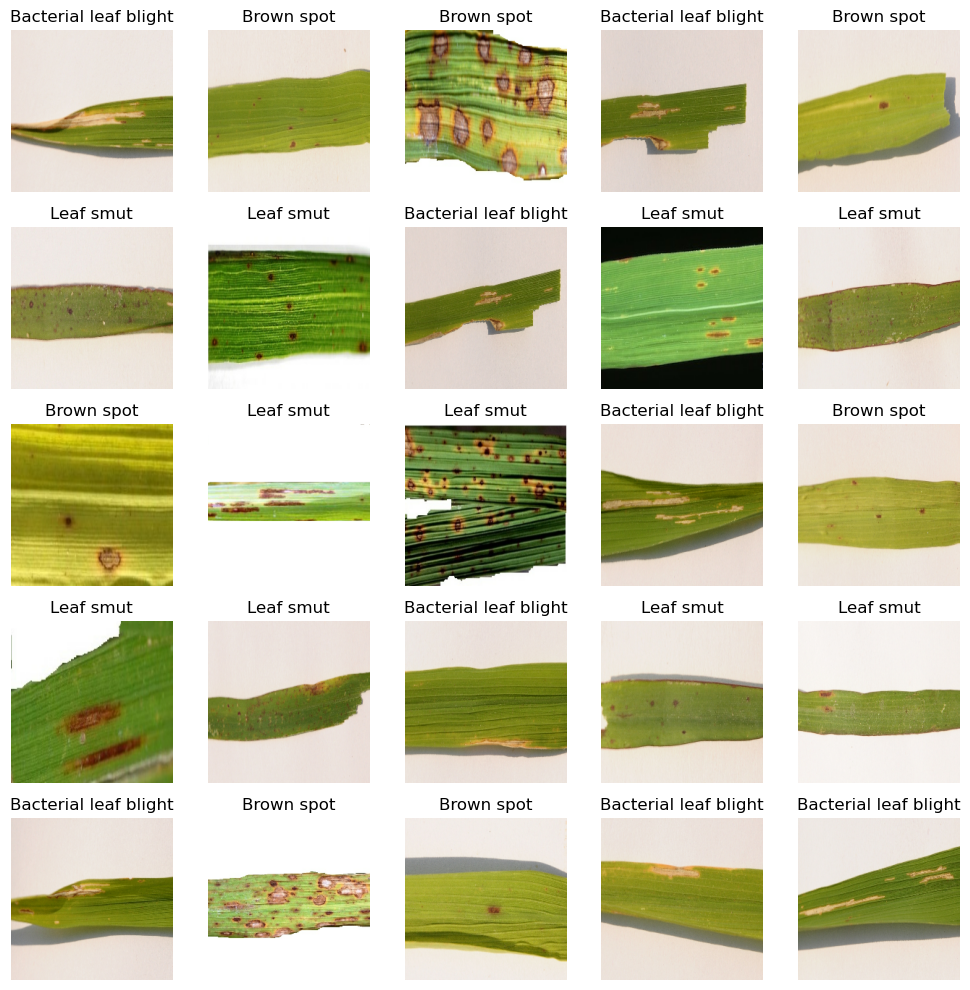

In [7]:
# Visualise images

plt.figure(figsize=(10,10))
for images , labels in data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()

# Data Preprocessing

In [8]:
# Create Dependent(y) and Independent(X) variable

X = []
y = []

for images , labels in data:
    X.append(images.numpy())
    y.append(labels.numpy())


In [9]:
# Convert X , y list into numpy array

X = np.concatenate(X ,axis=0)
y = np.concatenate(y ,axis=0)

In [10]:
#Print X
X

array([[[[236.      , 225.      , 219.      ],
         [235.      , 225.      , 216.      ],
         [235.      , 224.      , 218.      ],
         ...,
         [239.94286 , 231.94286 , 228.94286 ],
         [238.06563 , 230.49835 , 225.87204 ],
         [238.      , 229.      , 224.      ]],

        [[236.      , 225.      , 219.      ],
         [235.      , 225.      , 216.      ],
         [234.88617 , 225.88617 , 218.88617 ],
         ...,
         [239.88623 , 232.88623 , 226.88623 ],
         [238.4399  , 230.4399  , 227.4399  ],
         [238.      , 229.      , 224.      ]],

        [[235.      , 225.      , 216.      ],
         [235.06438 , 224.55322 , 217.0867  ],
         [234.88617 , 225.88617 , 218.88617 ],
         ...,
         [237.83061 , 232.83061 , 226.83061 ],
         [238.      , 230.      , 227.      ],
         [236.31836 , 229.31836 , 223.31836 ]],

        ...,

        [[235.30443 , 225.30443 , 216.30443 ],
         [236.      , 225.      , 219.      ]

In [11]:
#Print y
y

array([0, 1, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2,
       1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1,
       1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2,
       1, 1, 0, 2, 2, 0, 1, 2, 1])

# Normalise Data or Rescale the Images

In [12]:
# Normalise or reshape image size in the range of [0,1] , for that devide each pixels by 255

X = X.astype('float32')/255

# Split Data into train and test

In [13]:
# Splitting data into train and test/ validation

X_train, X_test = X[:100] ,X[100:]
y_train, y_test = y[:100] ,y[100:]

In [14]:
X_train.shape

(100, 224, 224, 3)

In [15]:
X_test.shape

(19, 224, 224, 3)

# Encoding

In [16]:
# Convert labels to one-hot encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train ,len(class_names))
y_test = to_categorical(y_test ,len(class_names))

# Create Model

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten ,Dense ,Dropout

# Define the Model Architecture

In [19]:
model = Sequential()
model.add(Conv2D(filters=16 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False ,input_shape=input_shape_3D))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=128 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 16)      432       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 74, 74, 32)        4608      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18432     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)        

# Compile the Model

In [20]:
# Define the model with optimizer , loss , metrics

model.compile(optimizer='Adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

# Train The Model

In [21]:
# We are assigning the checkpointer for save the model with val_accuracy

from keras.callbacks import ModelCheckpoint
check_pointer = ModelCheckpoint(filepath='model.weights.best.hdf5' ,
                                save_best_only=False ,
                                mode='auto' ,
                                monitor='val_accuracy' )

In [28]:
#Training the model

history = model.fit(X_train,y_train,batch_size=32 ,epochs=20 ,validation_data=(X_test,y_test) ,callbacks=[check_pointer] ,verbose=1 ,shuffle=True)

#epoch <--the number of times that the learning algorithm will work through the entire training dataset
#batch_size <-- how many samples for each iteration, When the batch size is set to 32, it means that during each iteration of training, the neural network processes 32 examples (data points) at a time.

Epoch 1/20
4/4 [==============================] - 3s 876ms/step - loss: 0.3217 - accuracy: 0.8500 - val_loss: 1.2424 - val_accuracy: 0.5789
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 0.2674 - accuracy: 0.9000 - val_loss: 1.1940 - val_accuracy: 0.6316
Epoch 3/20
4/4 [==============================] - 4s 934ms/step - loss: 0.2490 - accuracy: 0.8900 - val_loss: 1.3080 - val_accuracy: 0.5263
Epoch 4/20
4/4 [==============================] - 3s 771ms/step - loss: 0.2422 - accuracy: 0.8800 - val_loss: 1.7854 - val_accuracy: 0.6842
Epoch 5/20
4/4 [==============================] - 3s 741ms/step - loss: 0.2031 - accuracy: 0.9300 - val_loss: 1.2073 - val_accuracy: 0.6842
Epoch 6/20
4/4 [==============================] - 3s 756ms/step - loss: 0.2014 - accuracy: 0.9300 - val_loss: 1.1290 - val_accuracy: 0.6842
Epoch 7/20
4/4 [==============================] - 3s 727ms/step - loss: 0.2434 - accuracy: 0.9100 - val_loss: 1.0012 - val_accuracy: 0.6842
Epoch 8/20
4/4 [=======

# Predict the Model

In [29]:
# Visualize Some Predictions

#Make prediction for X_test
y_prediction = model.predict(X_test)

leaf_class = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

1/1 [==============================] - 0s 172ms/step


In [30]:
# Get the predicted class for each sample

predicted_classes = np.argmax(y_prediction, axis=1)
print(predicted_classes)

[1 1 2 0 2 1 1 0 1 2 1 2 0 2 2 0 1 2 1]


In [ ]:
# Assuming you have 'y_hat' for predictions and 'y_test' for ground truth
# Assuming 'leaf_class' is a list of class labels

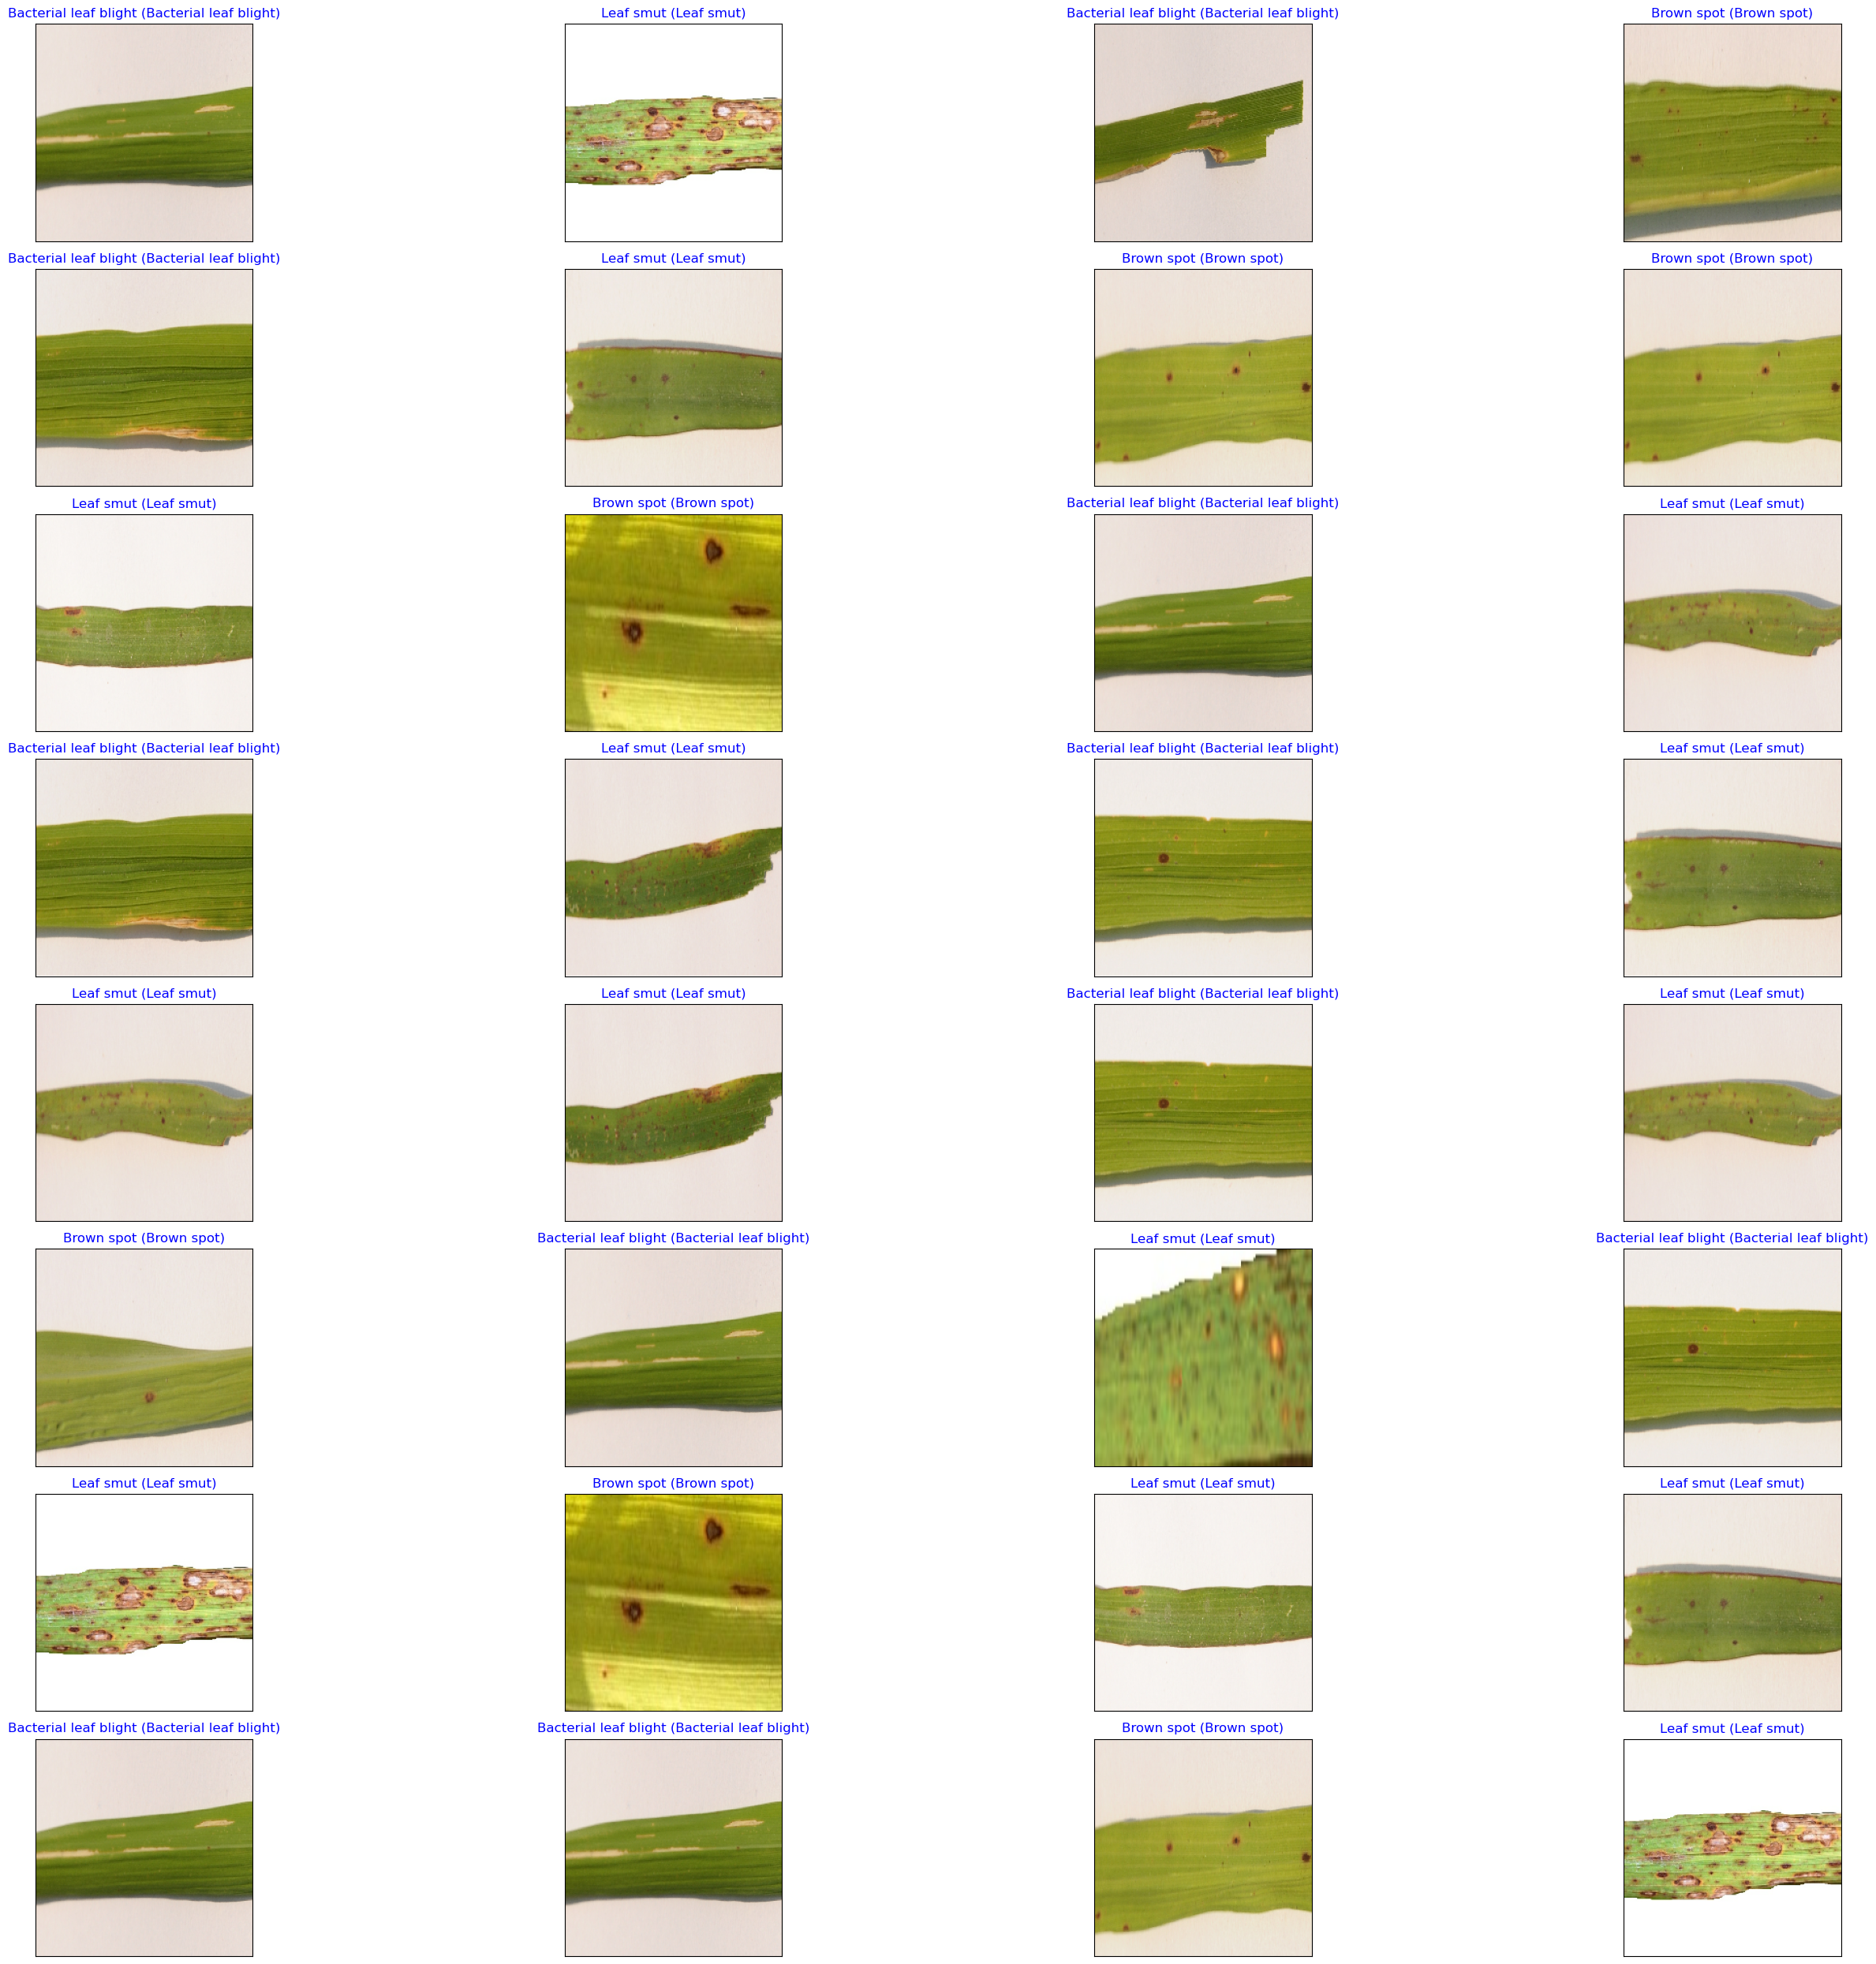

In [31]:
# Plot a random sample of test images, their predicted labels, and ground truth


fig = plt.figure(figsize=(30, 25))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=True)):
    ax = fig.add_subplot(8, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))

    # Assuming 'y_hat' contains the model predictions
    pred_idx = np.argmax(y_prediction[idx])

    true_idx = np.argmax(y_prediction[idx])

    ax.set_title("{} ({})".format(leaf_class[pred_idx], leaf_class[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

plt.tight_layout()

# Model Evaluation

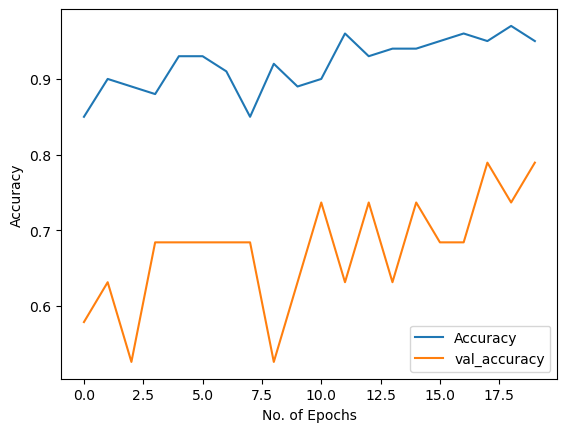

In [32]:
# Evaluate Model Performance

plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

### Check Accuracy

In [33]:
# Print Accuracy

test_Accuracy = model.evaluate(X_test,y_test)
print(f"Model's Accuracy : {test_Accuracy[1]*100}")

1/1 [==============================] - 0s 198ms/step - loss: 0.9861 - accuracy: 0.7895
Model's Accuracy : 78.94737124443054


# Conclusion:

-Using Convolutional Neural Networks we can classify whether on the given rice leaf what kind of disease is present.

-Model gives 78.95 accuarcy

-Accuracy changes with number of epoches.